# Import Libraries

In [115]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igair\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [182]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [183]:
import pandas as pd
import numpy as np
import re
import string

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

import plotly.express as px

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.utils import to_categorical

sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Data Loading

In [145]:
news_data = pd.read_csv("parsed_and_scored_news.csv")
news_data.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,MSFT,2021-10-03,11:55PM,Dow Jones Futures: Market Rally Attempt Begins...,0.000,0.789,0.211,0.4939
1,MSFT,2021-10-03,06:00PM,SoftBank Is Cutting More Deals With Fewer Staf...,0.130,0.870,0.000,-0.1280
2,MSFT,2021-10-03,02:40PM,Is Microsoft Stock A Buy Before Software Giant...,0.000,1.000,0.000,0.0000
3,MSFT,2021-10-03,06:05AM,These 5 Dividend Stocks Pay $71 Billion a Year...,0.123,0.877,0.000,-0.1027
4,MSFT,2021-10-02,07:00AM,A Newly Public Stock That's Beating Microsoft ...,0.273,0.727,0.000,-0.4588


In [146]:
conditions = [
    (news_data['compound'] < 0.0),
    (news_data['compound'] == 0.0),
    (news_data['compound'] > 0.0)
]

values = [0,1,2]
values2 = ['negative','neutral','positive']

news_data['label'] = np.select(conditions, values)
news_data['sentiment'] = np.select(conditions, values2)

news_data.head()

,ticker,date,time,headline,neg,neu,pos,compound,label,sentiment
0,MSFT,2021-10-03,11:55PM,Dow Jones Futures: Market Rally Attempt Begins...,0.000,0.789,0.211,0.4939,2,positive
1,MSFT,2021-10-03,06:00PM,SoftBank Is Cutting More Deals With Fewer Staf...,0.130,0.870,0.000,-0.1280,0,negative
2,MSFT,2021-10-03,02:40PM,Is Microsoft Stock A Buy Before Software Giant...,0.000,1.000,0.000,0.0000,1,neutral
3,MSFT,2021-10-03,06:05AM,These 5 Dividend Stocks Pay $71 Billion a Year...,0.123,0.877,0.000,-0.1027,0,negative
4,MSFT,2021-10-02,07:00AM,A Newly Public Stock That's Beating Microsoft ...,0.273,0.727,0.000,-0.4588,0,negative


In [147]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ticker     500 non-null    object 
 1   date       500 non-null    object 
 2   time       500 non-null    object 
 3   headline   500 non-null    object 
 4   neg        500 non-null    float64
 5   neu        500 non-null    float64
 6   pos        500 non-null    float64
 7   compound   500 non-null    float64
 8   label      500 non-null    int32  
 9   sentiment  500 non-null    object 
dtypes: float64(4), int32(1), object(5)
memory usage: 37.2+ KB


In [148]:
news_data.isnull().sum()

ticker       0
date         0
time         0
headline     0
neg          0
neu          0
pos          0
compound     0
label        0
sentiment    0
dtype: int64

In [149]:
news_data.duplicated().sum()

0

<AxesSubplot:xlabel='sentiment', ylabel='count'>

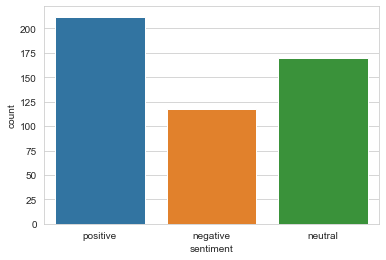

In [150]:
sns.countplot(news_data['sentiment'])

# Data Preprocessing

In [153]:
X_train, X_test, y_train, y_test = train_test_split(news_data.headline, news_data.label, test_size= 0.2, random_state=42)

In [154]:
def prepare_target(y_train, y_test):
  y_train_enc = to_categorical(y_train)
  y_test_enc = to_categorical(y_test)
  return y_train_enc, y_test_enc

y_train, y_test = prepare_target(y_train, y_test)

In [155]:
X_train, X_val, y_train, y_val = train_test_split(X_train.to_numpy(), y_train, test_size=0.2, random_state=42)

In [157]:
round(sum([len(i.split()) for i in X_train])/len(X_train))

11

In [158]:
# setup text vect
max_vocab_length = 4000
max_length = 12

text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode='int',
                                       output_sequence_length=max_length)

In [159]:
# vektorisasi teks
text_vectorization.adapt(X_train)

In [160]:
text_vectorization.get_vocabulary()[0]

''

In [161]:
sample_news = "These 5 Dividend Stocks Pay $71 Billion a Year, Combined, to Their Shareholders"
text_vectorization([sample_news])

<tf.Tensor: shape=(1, 12), dtype=int64, numpy=
array([[  28,   54,  261,    4,   80, 1221,   90,    6,   75, 1109,    2,
         619]], dtype=int64)>

In [162]:
import random

In [163]:
random_news = random.choice(X_train)
print(f"Teks Asli : {random_news}\n")
text_vectorization([random_news])

Teks Asli : Apple's iPhone privacy changes signal desire to enter advertising -RBC



<tf.Tensor: shape=(1, 12), dtype=int64, numpy=
array([[279,  39, 149, 509, 202, 486,   2, 477, 287, 147,   0,   0]],
      dtype=int64)>

In [164]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer="uniform",
                             input_length=max_length)

embedding

In [165]:
print(f"Teks Asli : {random_news}\n")

sample_embedded = embedding(text_vectorization([random_news]))
sample_embedded.shape

Teks Asli : Apple's iPhone privacy changes signal desire to enter advertising -RBC



TensorShape([1, 12, 128])

In [166]:
stop_words = set(stopwords.words("english"))


In [167]:
news_data['stopwords'] = news_data['headline'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
news_data[['headline','stopwords']].head(5)

,headline,stopwords
0,Dow Jones Futures: Market Rally Attempt Begins...,0
1,SoftBank Is Cutting More Deals With Fewer Staf...,0
2,Is Microsoft Stock A Buy Before Software Giant...,0
3,These 5 Dividend Stocks Pay $71 Billion a Year...,2
4,A Newly Public Stock That's Beating Microsoft ...,2


# Exploratory Data Analysis

In [168]:
temp = news_data.groupby('sentiment').count()['headline'].reset_index().sort_values(by='headline',ascending=False)
temp.style.background_gradient(cmap='Blues')

,sentiment,headline
2,positive,212
1,neutral,170
0,negative,118


In [169]:
fig = px.funnel(temp, x='headline', y='sentiment')
fig.show()

# Simple RNN

In [170]:
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorization(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_nlp_fc')

In [171]:
# compile model
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [172]:
model_1.summary()

Model: "model_nlp_fc"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization_5 (TextVe (None, 12)                0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 12, 128)           512000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 512,387
Trainable params: 512,387
Non-trainable params: 0
_________________________________________________________________


In [173]:
model_1_hist = model_1.fit(X_train,
                           y_train,
                           epochs=10,
                           validation_data=(X_val, y_val))

Epoch 1/10
10/10 [==============================] - 1s 60ms/step - loss: 1.0929 - accuracy: 0.4375 - val_loss: 1.0826 - val_accuracy: 0.6250
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 1.0626 - accuracy: 0.7312 - val_loss: 1.0637 - val_accuracy: 0.6375
Epoch 3/10
10/10 [==============================] - 0s 11ms/step - loss: 1.0315 - accuracy: 0.7969 - val_loss: 1.0423 - val_accuracy: 0.6625
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 0.9964 - accuracy: 0.8156 - val_loss: 1.0180 - val_accuracy: 0.6875
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: 0.9563 - accuracy: 0.8500 - val_loss: 0.9918 - val_accuracy: 0.6750
Epoch 6/10
10/10 [==============================] - 0s 12ms/step - loss: 0.9115 - accuracy: 0.8531 - val_loss: 0.9631 - val_accuracy: 0.6750
Epoch 7/10
10/10 [==============================] - 0s 11ms/step - loss: 0.8611 - accuracy: 0.8969 - val_loss: 0.9321 - val_accuracy: 0.6875
Epoch 8/10
10

In [174]:
model_1.evaluate(X_val, y_val)

3/3 [==============================] - 0s 3ms/step - loss: 0.8319 - accuracy: 0.7125


[0.8319295644760132, 0.7124999761581421]

In [176]:
res = model_1.predict(X_val)[:10]

In [177]:
res.argmax(axis=1)

array([2, 2, 2, 1, 2, 2, 0, 2, 1, 0], dtype=int64)

In [179]:
X_val[:10], y_val[:10]

(array(['3 Top Artificial Intelligence Stocks to Buy Right Now',
        'Amazon: A $1.7 Trillion Company With Nothing But Blue Skies Above',
        'Google announces redesign of Search engine with more pictures and extra context about results',
        'Apple Pay flaw risks letting hackers drain money from iPhones',
        'Google Adds Context to Search Results to Combat Misinformation',
        'Facebooks Instagram for kids is all about creating a de facto lock-in effect',
        'Celebrity Instagram content linked to negative feelings, Facebook researchers say',
        '3 High-Growth Stocks That Could Be Worth $1 Trillion in 10 Years -- or Sooner',
        'Googles President of Commerce on shopping trends amid e-commerce boom',
        'Dow Jones Futures: No End To Stock Market Woes; Infrastructure Bill In Doubt, Tesla, Nio Deliveries Loom'],
       dtype=object),
 array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
      

# LSTM

In [184]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorization(inputs)
x = embedding(x)
x = layers.LSTM(64)(x)
outputs = layers.Dense(3, activation='softmax')(x)
model_2 = tf.keras.Model(inputs, outputs, name="LSTM_model")

NotImplementedError: Cannot convert a symbolic Tensor (lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
model_2.summary()